# Cas pratique en Python

## Devenons botanistes avec du machine learning

L'idée de cet exercice est de **classer** des iris par espèce en fonction de leur **caractéristiques**.

Nous pouvons faire cet exemple car nous avons à notre disposition un **jeu de données** sur 150 iris qui sont classées par espèces.

Nous avons les données suivantes pour chaque fleur :

- Longueur du pétale (cm)
- Largeur du pétale (cm)
- Longueur du sépale (cm)
- Largeur du sépale (cm)

Nous avons aussi pour chaque fleur son espèce.

Grâce à ces données, nous pouvons entraîner notre machine à **apprendre** et à **reconnaître** d'éventuelles futures iris !

Cet exemple est largement inspiré de l'article [initiation au machine learning avec Python](https://makina-corpus.com/blog/metier/2017/initiation-au-machine-learning-avec-python-pratique)

## Visualisons nos données

### Chargement


In [483]:
# On utilise la librairie scikit learn pour le machine learning
from sklearn import datasets

# On charge des données de test
iris = datasets.load_iris()

### Affichage des caractéristiques

On affiche quelque chose en Python avec la fonction `print()`.

Les caractéristiques sont disponibles dans l'attribut `feature_names` de l'objet `iris` ==> `iris.feature_names`.

In [484]:
# Affichage des caractéristiques des mesures

# A vous de jouer

### Affichage des premières mesures

Les mesures sont disponibles dans l'attribut `data` de l'objet `iris` ==> `iris.data`.

L'attribut `data` est un tableau. Pour accéder aux 10 premières mesures, d'un tableau nommé `mon_tableau` on peut utiliser la notation suivante : `mon_tableau[0:10]`.

In [485]:
# Affichage des 5 premières mesures

# A vous de jouer

### Affichage des espèces de fleurs

Les différentes espèces de fleurs sont disponibles dans l'attribut `target_names` de l'objet `iris` ==> `iris.target_names`.

In [486]:
# Affichage des classes de fleurs

# A vous de jouer

### Affichage des classifications des fleurs

Les classifications sont disponibles dans l'attribut `target` de l'objet `iris` ==> `iris.target`.

L'attribut `target` est un tableau.

In [487]:
# Affichage des classifications

# A vous de jouer

### Affichage de graphique représentant les données

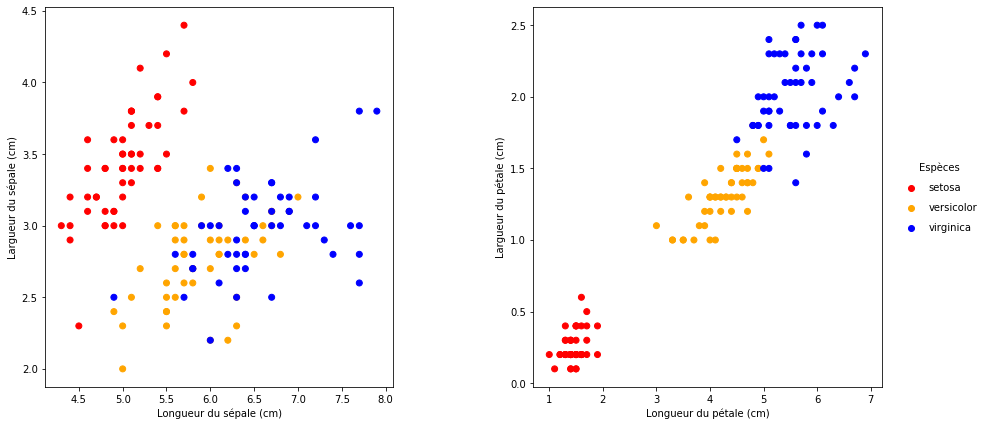

In [488]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

data = iris.data

fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax1 = plt.subplot(1,2,1)

clist = ['red', 'orange', 'blue']
colors = [clist[c] for c in iris.target]

ax1.scatter(data[:, 0], data[:, 1], c=colors)
plt.xlabel('Longueur du sépale (cm)')
plt.ylabel('Largueur du sépale (cm)')

ax2 = plt.subplot(1,2,2)

ax2.scatter(data[:, 2], data[:, 3], color=colors)

plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largueur du pétale (cm)')

# Légende
for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, bbox_to_anchor=(1.3, .5), loc="center right", title='Espèces')
plt.plot()

## Essayons d'apprendre à la machine

### Quel algorithme choisir

#### Les plus proches voisins

Comment feriez-vous pour classifier "à la main" les mesures des fleurs ?

Moi je ferais bien un test avec les plus **proches voisins** vu le graphique ! Cela veut dire qu'on va utiliser un algorithme qui va essayer de classifier une fleur en essayant de trouver les fleurs dont les mesures se rapprochent le plus.

Pour les quatre mesures d'une fleur (longueur et largeur / pétale et sépale), je prends les n plus proches mesures par rapport à celle de cette fleur et je choisis la catégorie la plus représentée.


In [489]:
from sklearn import neighbors
from sklearn.metrics import accuracy_score

# On sépare nos données en deux groupes
# Les données de test du modèle (pour véfier le modèle)
data_test, target_test = data[::2], iris.target[::2]
# Les données d'entraînement du modèle
data_train, target_train = data[1::2], iris.target[1::2]

# On choisit le modèle
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
# On entraîne le modèle avec la fonction fit
clf.fit(data_train, target_train)
# On tente une prédiction sur les données de test
result = clf.predict(data_test)

# On vérifie la précision du modèle
score = accuracy_score(result, target_test)
print(score)

0.96


#### Comment faire mieux

Essayez de faire varier le paramètre `n_neighbors` et donnez moi la meilleure optimisation.

#### Comment se rendre compte de la précision du modèle

On va afficher la matrice de confusion pour se rendre compte des erreurs de notre modèle.

Text(91.68, 0.5, 'valeurs réelles')

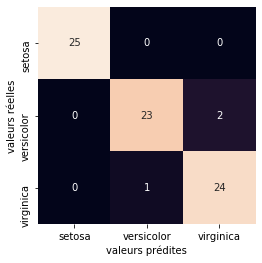

In [490]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# On calcule la matrice de confusion
conf = confusion_matrix(target_test, result)

# On affiche la matrice sous forme de graphique
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')

#### Territoires de classification

Afin de se rendre compte de ce qu'a appris la machine, on va afficher la façon dont il classifie tout ça.

##### Etape 1 : Pétales

[]

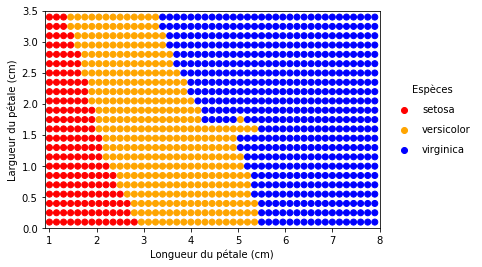

In [491]:
# Récupération des longeurs/largeurs de pétales seulement
data = iris.data[:, 2:4]

# On apprend à nouveau (cette fois sans séparer données de test et données de validation ==> on s'entraine avec toutes les données)
clf.fit(data, iris.target)

# On recherche les valeurs min/max de longueurs/largeurs des pétales
x_min, x_max = data[:, 0].min(), data[:, 0].max() + 1
y_min, y_max = data[:, 1].min(), data[:, 1].max() + 1

# On en fait des tableaux de valeurs allant de min à max avec un pas de h
h = .15
x = np.arange(x_min, x_max, h)
y = np.arange(y_min, y_max, h)

# On se fait une grille avec ces points
xx, yy = np.meshgrid(x, y)
data_samples = list(zip(xx.ravel(), yy.ravel()))

# On tente une validation du modèle avec ces valeurs
result = clf.predict(data_samples)

plt.figure(1)
clist = ['red', 'orange', 'blue']
colors = [clist[c] for c in result]

plt.scatter(xx.ravel(), yy.ravel(), c=colors)
plt.xlim(xx.min() - .1, xx.max() + .1)
plt.ylim(yy.min() - .1, yy.max() + .1)
plt.xlabel('Longueur du pétale (cm)')
plt.ylabel('Largueur du pétale (cm)')

for ind, s in enumerate(iris.target_names):
    # on dessine de faux points, car la légende n'affiche que les points ayant un label
    plt.scatter([], [], label=s, color=clist[ind])

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, bbox_to_anchor=(1.3, .5), loc="center right", title='Espèces')
plt.plot()

#### Visualisation de l'importance du choix du paramètre

Refaites varier le paramètre `n` (nombre de voisins à considérer), et regarder les changements sur les graphiques. C'est cool, non ?

### La classification Naive Bayes

On va tester un autre algorithme pour classifier nos fleurs et voir s'il est plus efficace !

0.9466666666666667


Text(91.68, 0.5, 'valeurs réelles')

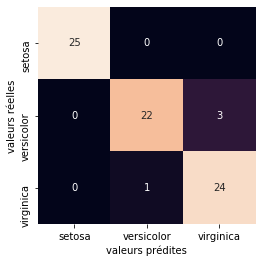

In [493]:
from sklearn.naive_bayes import GaussianNB

data = iris.data
# On sépare nos données en deux groupes
# Les données de test du modèle (pour véfier le modèle)
data_test, target_test = data[::2], iris.target[::2]
# Les données d'entraînement du modèle
data_train, target_train = data[1::2], iris.target[1::2]

# On choisit le modèle
clf = GaussianNB()
# On entraîne le modèle avec la fonction fit
# TODO : A vous d'écrire comment on entraine le modèle

# On tente une prédiction sur les données de test
# TODO : A vous d'écrire comment on fait une prédiction

# On vérifie la précision du modèle
score = accuracy_score(result, target_test)
# TODO : A vous d'afficher le score

# On calcule la matrice de confusion
# TODO : A vous d'écrire comment calculer la matrice de confusion

# On affiche la matrice sous forme de graphique
sns.heatmap(conf, square=True, annot=True, cbar=False
            , xticklabels=list(iris.target_names)
            , yticklabels=list(iris.target_names))
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')